**Loading the dataset**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/MajorProject

import cifar10

cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

class_names = cifar10.load_class_names()
images_train, cls_train, labels_train= cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

x_train = images_train[0:45000]
y_train = labels_train[0:45000]


x_valid = images_train[45000:50000]
y_valid = labels_train[45000:50000]

x_test = images_test
y_test = labels_test

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/MajorProject
Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


**Import Statements**

In [2]:
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, BatchNormalization
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import time
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Building the Model**

In [3]:
def SequentialNet():
  model = Sequential()

  model.add(Conv2D(64, (3,3), activation = 'relu', padding = "same", input_shape = (32,32,3), kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation = 'relu', padding = "same", kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3,3), activation = 'relu', padding = "same", kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, (3,3), activation = 'relu', padding = "same", kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), activation = 'relu', padding = "same", kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3,3), activation = 'relu', padding = "same", kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(256, (3,3), activation = 'relu', padding = "same", kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3,3), activation = 'relu', padding = "same", kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3,3), activation = 'relu', padding = "same", kernel_initializer = glorot_uniform(seed = 0)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(1024, activation = 'relu', kernel_initializer = glorot_uniform(seed = 0)))
  model.add(Dropout(0.5))
  model.add(Dense(1024, activation = 'relu', kernel_initializer = glorot_uniform(seed = 0)))
  model.add(Dropout(0.5))
  model.add(Dense(1024, activation = 'relu', kernel_initializer = glorot_uniform(seed = 0)))
  model.add(Dropout(0.7))
  model.add(Dense(1024, activation = 'relu', kernel_initializer = glorot_uniform(seed = 0)))
  model.add(Dropout(0.8))

  model.add(Dense(10, activation = 'softmax'))

  return model

In [4]:
model = SequentialNet()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0

**Augmentation**

In [5]:
datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest')
it_train = datagen.flow(x_train, y_train, batch_size = 100)

**Training the Model**

In [6]:
model = SequentialNet()
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 1.0e-4), metrics = ['accuracy'])
start = time.time()
model.fit_generator(it_train, epochs = 1, validation_data = (x_valid, y_valid))
end = time.time()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


450/450 [==============================] - 74s 62ms/step - loss: 3.7397 - accuracy: 0.1004 - val_loss: 2.3018 - val_accuracy: 0.0976


In [7]:
model = SequentialNet()
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 1.0e-4), metrics = ['accuracy'])
history = model.fit_generator(it_train, epochs = 200, validation_data = (x_valid, y_valid))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
450/450 [==============================] - 30s 60ms/step - loss: 3.7401 - accuracy: 0.1020 - val_loss: 2.3010 - val_accuracy: 0.1114
Epoch 2/200
450/450 [==============================] - 26s 58ms/step - loss: 2.3122 - accuracy: 0.1042 - val_loss: 2.2935 - val_accuracy: 0.1500
Epoch 3/200
450/450 [==============================] - 26s 58ms/step - loss: 2.2848 - accuracy: 0.1187 - val_loss: 2.1834 - val_accuracy: 0.1814
Epoch 4/200
450/450 [==============================] - 27s 60ms/step - loss: 2.2217 - accuracy: 0.1565 - val_loss: 2.1300 - val_accuracy: 0.1988
Epoch 5/200
450/450 [==============================] - 27s 60ms/step - loss: 2.1747 - accuracy: 0.1782 - val_loss: 2.1168 - val_accuracy: 0.1702
Epoch 6/200
450/450 [==============================] - 27s 59ms/step - loss: 2.1246 - accuracy: 0.1865 - val_loss: 1.9902 - val_accuracy: 0.2372
Epoch 7/200
450/450 [==============================] - 27s 59ms/step - loss: 2.0574 - accuracy: 0.2063 - val_loss: 1.9117 - val_ac

**Saving the Model, History and Time**

In [8]:
model.save('SequentialNetAug.h5')

In [9]:
np.save('SequentialNetAug_history.npy', history.history)

In [10]:
with open('SequentialNetAug_time.pkl', 'wb') as f:
    pickle.dump(round(end - start), f)

**Training Analysis**

In [11]:
with open('SequentialNetAug_time.pkl', 'rb') as f: 
    time_loaded = pickle.load(f)
print("Time taken for training (1 epoch): ", time_loaded, "seconds")

Time taken for training (1 epoch):  74 seconds


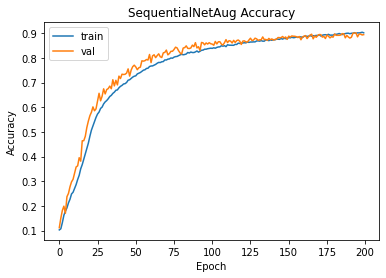

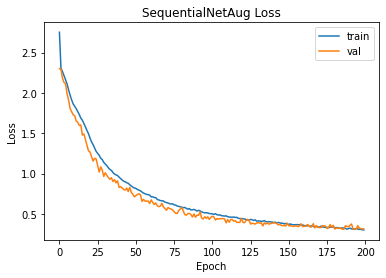

In [12]:
history_loaded = np.load('SequentialNetAug_history.npy', allow_pickle = 'TRUE').item()

plt.plot(history_loaded['accuracy'])
plt.plot(history_loaded['val_accuracy'])
plt.title('SequentialNetAug Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history_loaded['loss'])
plt.plot(history_loaded['val_loss'])
plt.title('SequentialNetAug Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

**Testing Analysis**

In [3]:
model_loaded = load_model('SequentialNetAug.h5')
y_pred = model_loaded.predict(x_test)

In [4]:
def convert(y):
  return [class_names[np.argmax(i)] for i in y]

y_pred_class = convert(y_pred)
y_true_class = convert(y_test)

********** Accuracy **********

 89.28 %


********** Classification Report ***********

               precision    recall  f1-score   support

    airplane       0.93      0.88      0.90      1000
  automobile       0.94      0.96      0.95      1000
        bird       0.92      0.82      0.87      1000
         cat       0.81      0.80      0.80      1000
        deer       0.87      0.90      0.88      1000
         dog       0.88      0.81      0.85      1000
        frog       0.81      0.97      0.89      1000
       horse       0.94      0.92      0.93      1000
        ship       0.95      0.92      0.94      1000
       truck       0.89      0.95      0.92      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



********** Confusion Matrix ***********




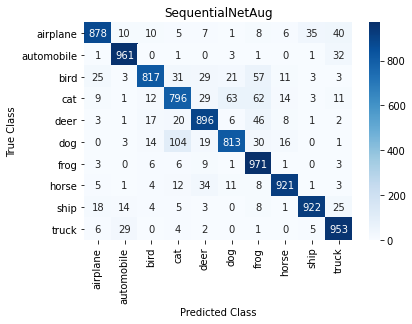

In [5]:
print("********** Accuracy **********\n\n", accuracy_score(y_true_class, y_pred_class) * 100, "%")
print("\n\n********** Classification Report ***********\n\n", classification_report(y_true_class, y_pred_class))
print("\n\n********** Confusion Matrix ***********\n\n")
sns.heatmap(confusion_matrix(y_true_class, y_pred_class), annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('SequentialNetAug')
plt.show()